<a href="https://colab.research.google.com/github/nazalan/MScOnlab1/blob/main/3ActorGame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10.hét

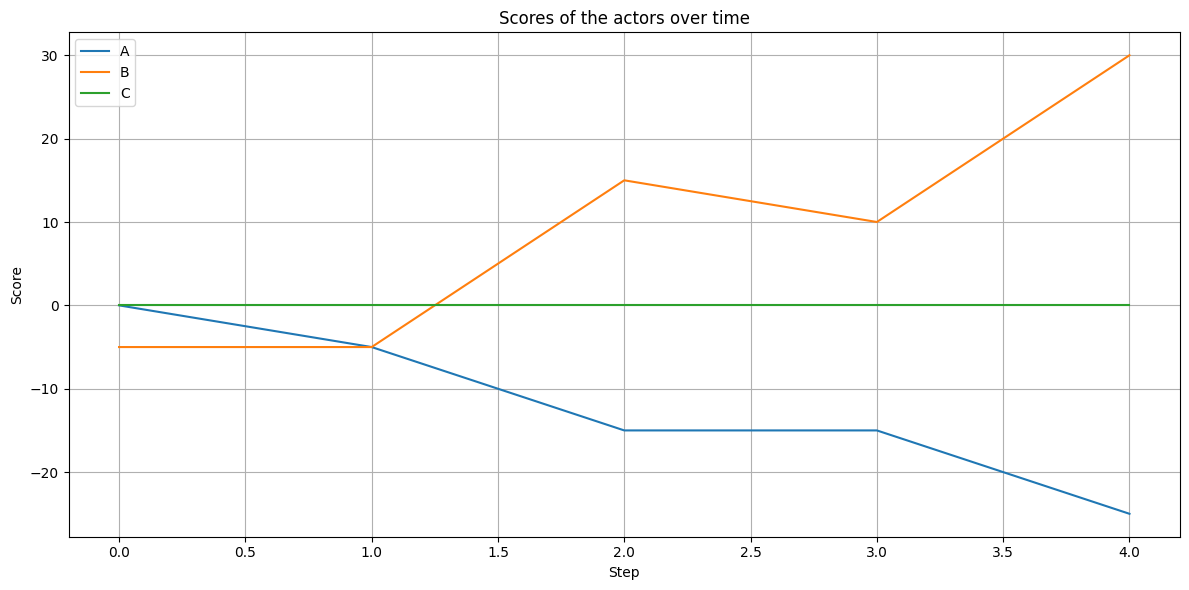

Decisions:
[0] B's decision: attack, failed attack (-5)
[1] C's decision: attack – cannot attack
[2] A's decision: attack, failed attack (-5)
[3] C's decision: attack – cannot attack
[4] B's decision: attack, successful attack on A (+20, -10)
[5] C's decision: attack – cannot attack
[6] C's decision: attack – cannot attack
[7] B's decision: attack, failed attack (-5)
[8] C's decision: attack – cannot attack
[9] B's decision: attack, successful attack on A (+20, -10)


In [ ]:
# Everything is random

# Actors and default values
actors = ["A", "B", "C"]
num_steps = 10  # Number of steps
disclose_reward = 10
sell_reward = 15
attack_gain = 20
attack_loss = {"A": -10, "B": -15}
attack_fail_penalty = -5
attack_success_chance = {"A": 0.7, "B": 0.5}

# Logging decisions
decisions_log = []

# Restarting the simulation data
scores = {"A": 0, "B": 0, "C": 0}
history = {"A": [], "B": [], "C": []}

for step in range(num_steps):
    discoverer = random.choice(actors)
    action = decide_action(discoverer)
    log_entry = f"[{step}] {discoverer}'s decision: {action}"

    if action == "disclose":
        scores[discoverer] += disclose_reward
        log_entry += f" (+{disclose_reward})"

    elif action == "sell":
        scores[discoverer] += sell_reward
        buyer = random.choice(["A", "B"])
        log_entry += f", sold to {buyer} (+{sell_reward})"
        discoverer = buyer
        action = "attack"
        log_entry += f" → {discoverer} attacks"

    if action == "attack":
        if discoverer not in ["A", "B"]:
            decisions_log.append(log_entry + " – cannot attack")
            continue
        target = "B" if discoverer == "A" else "A"
        success_prob = attack_success_chance[discoverer]
        success = random.random() < success_prob
        if success:
            scores[discoverer] += attack_gain
            scores[target] += attack_loss[target]
            log_entry += f", successful attack on {target} (+{attack_gain}, {attack_loss[target]})"
        else:
            scores[discoverer] += attack_fail_penalty
            log_entry += f", failed attack ({attack_fail_penalty})"

    decisions_log.append(log_entry)

    for actor in actors:
        history[actor].append(scores[actor])

# Visualization of the scores
plt.figure(figsize=(12, 6))
for actor in actors:
    plt.plot(history[actor], label=f"{actor}")
plt.xlabel("Step")
plt.ylabel("Score")
plt.title("Scores of the actors over time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Decisions:")
print("\n".join(decisions_log))


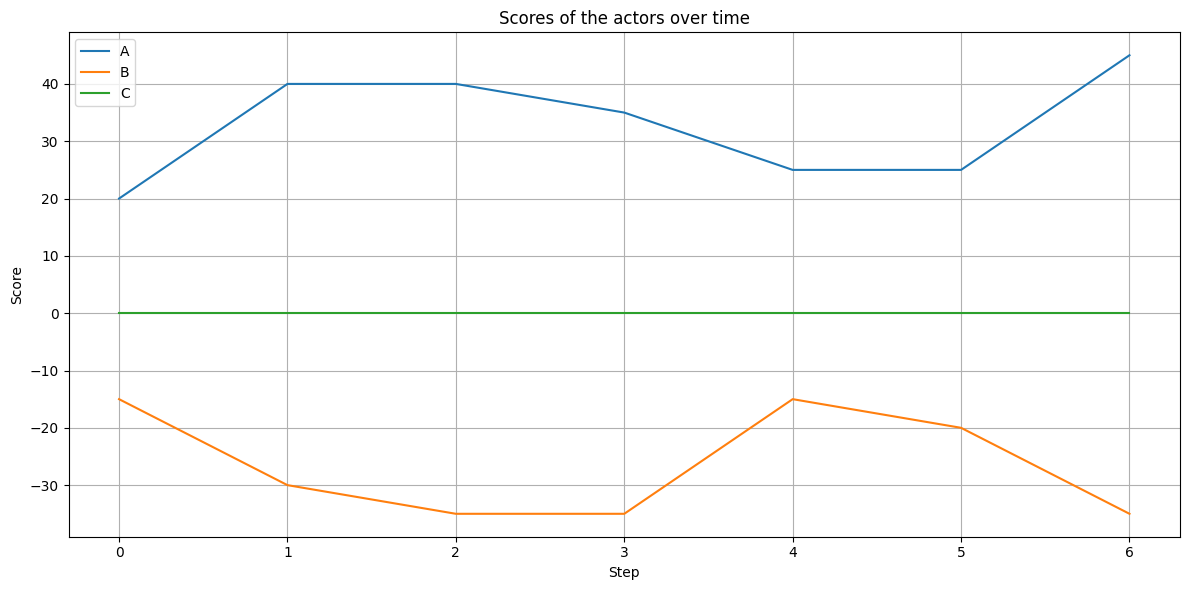

Decisions:
[0] A's decision: attack, successful attack on B (+20, -15)
[1] A's decision: attack, successful attack on B (+20, -15)
[2] B's decision: attack, failed attack (-5)
[3] C's decision: attack – cannot attack
[4] A's decision: attack, failed attack (-5)
[5] B's decision: attack, successful attack on A (+20, -10)
[6] C's decision: attack – cannot attack
[7] C's decision: attack – cannot attack
[8] B's decision: attack, failed attack (-5)
[9] A's decision: attack, successful attack on B (+20, -15)


In [ ]:
# Dummy rational decision-making
import random
import matplotlib.pyplot as plt

# Actors and default values
actors = ["A", "B", "C"]
num_steps = 10  # Number of steps
disclose_reward = 10
sell_reward = 15
attack_gain = 20
attack_loss = {"A": -10, "B": -15}
attack_fail_penalty = -5
attack_success_chance = {"A": 0.7, "B": 0.5}

# Decision logic: actors make rational decisions
def decide_action(discoverer):
    if scores[discoverer] < 50:
        # With a low score, prefer to attack
        return "attack"
    elif scores[discoverer] > 100:
        # With a high score, prefer to disclose
        return "disclose"
    else:
        # With a medium score, decide randomly
        return random.choice(["disclose", "sell", "attack"])

# Logging decisions
decisions_log = []

# Initializing simulation data
scores = {"A": 0, "B": 0, "C": 0}
history = {"A": [], "B": [], "C": []}

# Simulation steps
for step in range(num_steps):
    discoverer = random.choice(actors)
    action = decide_action(discoverer)
    log_entry = f"[{step}] {discoverer}'s decision: {action}"

    if action == "disclose":
        scores[discoverer] += disclose_reward
        log_entry += f" (+{disclose_reward})"

    elif action == "sell":
        scores[discoverer] += sell_reward
        buyer = random.choice(["A", "B"])
        log_entry += f", sold to {buyer} (+{sell_reward})"
        discoverer = buyer
        action = "attack"
        log_entry += f" → {discoverer} attacks"

    if action == "attack":
        if discoverer not in ["A", "B"]:
            decisions_log.append(log_entry + " – cannot attack")
            continue
        target = "B" if discoverer == "A" else "A"
        success_prob = attack_success_chance[discoverer]
        success = random.random() < success_prob
        if success:
            scores[discoverer] += attack_gain
            scores[target] += attack_loss[target]
            log_entry += f", successful attack on {target} (+{attack_gain}, {attack_loss[target]})"
        else:
            scores[discoverer] += attack_fail_penalty
            log_entry += f", failed attack ({attack_fail_penalty})"

    decisions_log.append(log_entry)

    for actor in actors:
        history[actor].append(scores[actor])

# Visualization of scores
plt.figure(figsize=(12, 6))
for actor in actors:
    plt.plot(history[actor], label=f"{actor}")
plt.xlabel("Step")
plt.ylabel("Score")
plt.title("Scores of the actors over time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Decisions:")
print("\n".join(decisions_log))


In [ ]:
pip install nashpy

In [ ]:
# Calculating Nash equilibrium
import nashpy as nash
import numpy as np

# Initializing payoff matrices
payoff_matrix_A = np.array([[5, 0], [10, 2]])  # Payoff matrix for A
payoff_matrix_B = np.array([[5, 10], [0, 2]])  # Payoff matrix for B

# Searching for Nash equilibria from the payoff matrices
game = nash.Game(payoff_matrix_A, payoff_matrix_B)
equilibria = game.support_enumeration()  # Finding Nash equilibria

print("\nNash Equilibria:")
for eq in equilibria:
    print(eq)



Nash Equilibria:
(array([0., 1.]), array([0., 1.]))


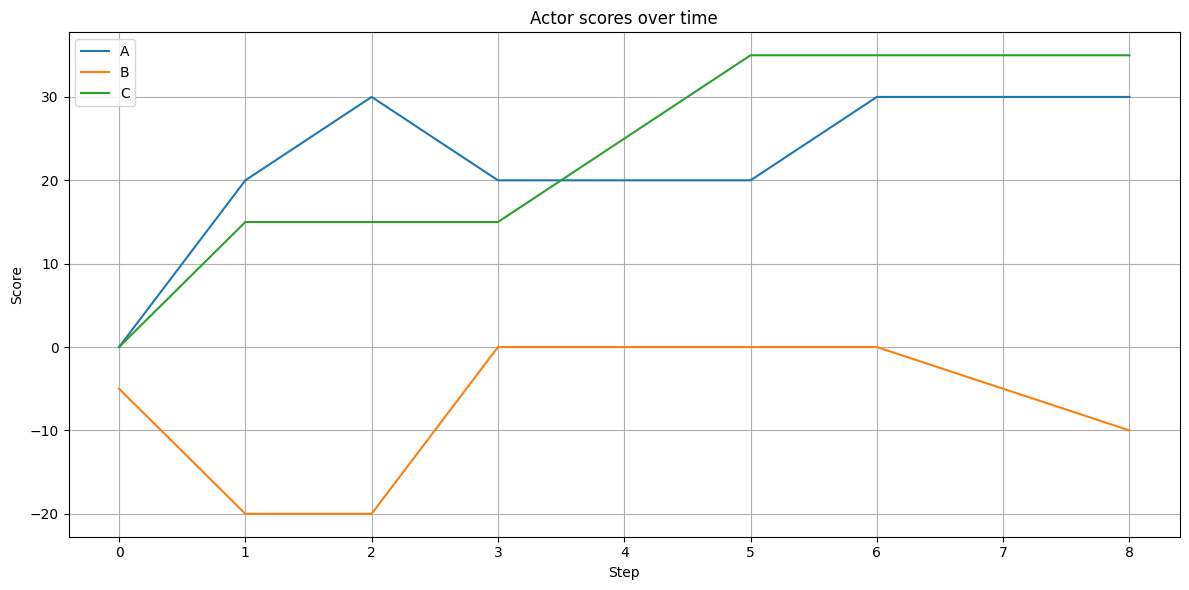

Decisions:
[0] B's decision: attack, failed attack (-5)
[1] C's decision: sell, sold to A (+15) → A attacks, successful attack on B (+20, -15)
[2] A's decision: disclose (+10)
[3] B's decision: attack, successful attack on A (+20, -10)
[4] C's decision: disclose (+10)
[5] C's decision: disclose (+10)
[6] C's decision: attack – cannot attack
[7] A's decision: disclose (+10)
[8] B's decision: attack, failed attack (-5)
[9] B's decision: attack, failed attack (-5)


In [ ]:
# Player C has no payoff matrix and decisions consider Nash equilibrium

import random
import matplotlib.pyplot as plt
import numpy as np

# Actors and default values
actors = ["A", "B", "C"]
num_steps = 10  # Number of steps
disclose_reward = 10
sell_reward = 15
attack_gain = 20
attack_loss = {"A": -10, "B": -15}
attack_fail_penalty = -5
attack_success_chance = {"A": 0.7, "B": 0.5}

# Payoff matrices (for rational decisions)
payoff_matrix_A = np.array([[5, 0], [10, 2]])  # Payoff matrix for A
payoff_matrix_B = np.array([[5, 10], [0, 2]])  # Payoff matrix for B

# Decision logic: actors make rational decisions
def decide_action_rational(discoverer):
    # Use A and B’s payoff matrices
    if discoverer == "A":
        payoff_matrix = payoff_matrix_A
    elif discoverer == "B":
        payoff_matrix = payoff_matrix_B
    else:
        # If the actor is C, choose randomly since C has no defined payoff matrix
        return random.choice(["disclose", "sell", "attack"])

    # Rational decision based on best payoff (maximize reward)
    # Choose the best action based on the payoff matrix
    best_choice = np.argmax(payoff_matrix[0])  # Select the best payoff
    return "disclose" if best_choice == 0 else "attack"

# Logging decisions
decisions_log = []

# Initialize simulation data
scores = {"A": 0, "B": 0, "C": 0}
history = {"A": [], "B": [], "C": []}

# Simulation steps
for step in range(num_steps):
    discoverer = random.choice(actors)
    action = decide_action_rational(discoverer)
    log_entry = f"[{step}] {discoverer}'s decision: {action}"

    if action == "disclose":
        scores[discoverer] += disclose_reward
        log_entry += f" (+{disclose_reward})"

    elif action == "sell":
        scores[discoverer] += sell_reward
        buyer = random.choice(["A", "B"])
        log_entry += f", sold to {buyer} (+{sell_reward})"
        discoverer = buyer
        action = "attack"
        log_entry += f" → {discoverer} attacks"

    if action == "attack":
        if discoverer not in ["A", "B"]:
            decisions_log.append(log_entry + " – cannot attack")
            continue
        target = "B" if discoverer == "A" else "A"
        success_prob = attack_success_chance[discoverer]
        success = random.random() < success_prob
        if success:
            scores[discoverer] += attack_gain
            scores[target] += attack_loss[target]
            log_entry += f", successful attack on {target} (+{attack_gain}, {attack_loss[target]})"
        else:
            scores[discoverer] += attack_fail_penalty
            log_entry += f", failed attack ({attack_fail_penalty})"

    decisions_log.append(log_entry)

    for actor in actors:
        history[actor].append(scores[actor])

# Visualization of scores
plt.figure(figsize=(12, 6))
for actor in actors:
    plt.plot(history[actor], label=f"{actor}")
plt.xlabel("Step")
plt.ylabel("Score")
plt.title("Actor scores over time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Decisions:")
print("\n".join(decisions_log))


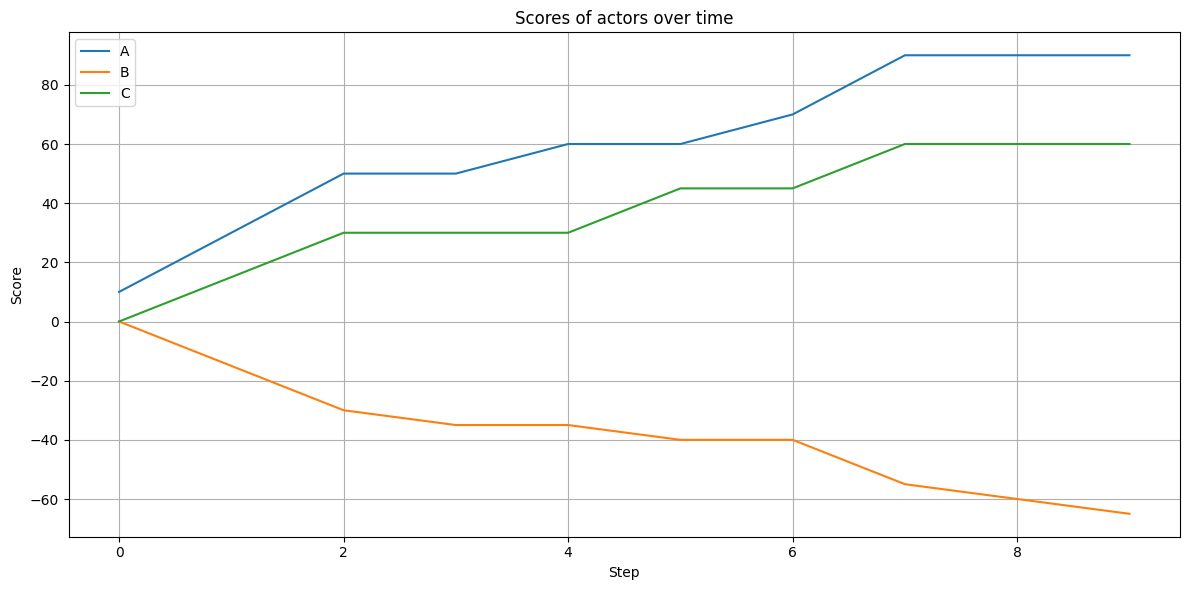

Decisions:
[0] A's decision: disclose (+10)
[1] C's decision: sell, sold to A (+15) → A attacks, successful attack on B (+20, -15)
[2] C's decision: sell, sold to A (+15) → A attacks, successful attack on B (+20, -15)
[3] B's decision: attack, failed attack (-5)
[4] A's decision: disclose (+10)
[5] C's decision: sell, sold to B (+15) → B attacks, failed attack (-5)
[6] A's decision: disclose (+10)
[7] C's decision: sell, sold to A (+15) → A attacks, successful attack on B (+20, -15)
[8] B's decision: attack, failed attack (-5)
[9] B's decision: attack, failed attack (-5)


In [ ]:
# Introducing a payoff matrix for player C

import random
import matplotlib.pyplot as plt
import numpy as np

# Actors and default values
actors = ["A", "B", "C"]
num_steps = 10  # Number of steps
disclose_reward = 10
sell_reward = 15
attack_gain = 20
attack_loss = {"A": -10, "B": -15}
attack_fail_penalty = -5
attack_success_chance = {"A": 0.7, "B": 0.5}

# Payoff matrices (for rational decisions)
payoff_matrix_A = np.array([[5, 0], [10, 2]])  # Payoff matrix for A
payoff_matrix_B = np.array([[5, 10], [0, 2]])  # Payoff matrix for B
payoff_matrix_C = np.array([[3, 7], [8, 4]])   # Payoff matrix for C (C cannot attack)

# Decision logic: actors make rational decisions
def decide_action_rational(discoverer):
    # Payoff matrices for A, B, and C
    if discoverer == "A":
        payoff_matrix = payoff_matrix_A
    elif discoverer == "B":
        payoff_matrix = payoff_matrix_B
    else:  # In case of C
        payoff_matrix = payoff_matrix_C

    # Make a rational decision based on the best choice (maximum payoff)
    best_choice = np.argmax(payoff_matrix[0])  # Select the best payoff
    if discoverer == "C":
        # C cannot attack, can only choose between "disclose" and "sell"
        return "disclose" if best_choice == 0 else "sell"
    return "disclose" if best_choice == 0 else "attack"

# Logging decisions
decisions_log = []

# Initialize simulation data
scores = {"A": 0, "B": 0, "C": 0}
history = {"A": [], "B": [], "C": []}

# Simulation steps
for step in range(num_steps):
    discoverer = random.choice(actors)
    action = decide_action_rational(discoverer)
    log_entry = f"[{step}] {discoverer}'s decision: {action}"

    if action == "disclose":
        scores[discoverer] += disclose_reward
        log_entry += f" (+{disclose_reward})"

    elif action == "sell":
        scores[discoverer] += sell_reward
        buyer = random.choice(["A", "B"])
        log_entry += f", sold to {buyer} (+{sell_reward})"
        discoverer = buyer
        action = "attack"
        log_entry += f" → {discoverer} attacks"

    if action == "attack":
        if discoverer not in ["A", "B"]:
            decisions_log.append(log_entry + " – cannot attack")
            continue
        target = "B" if discoverer == "A" else "A"
        success_prob = attack_success_chance[discoverer]
        success = random.random() < success_prob
        if success:
            scores[discoverer] += attack_gain
            scores[target] += attack_loss[target]
            log_entry += f", successful attack on {target} (+{attack_gain}, {attack_loss[target]})"
        else:
            scores[discoverer] += attack_fail_penalty
            log_entry += f", failed attack ({attack_fail_penalty})"

    decisions_log.append(log_entry)

    for actor in actors:
        history[actor].append(scores[actor])

# Visualization of scores
plt.figure(figsize=(12, 6))
for actor in actors:
    plt.plot(history[actor], label=f"{actor}")
plt.xlabel("Step")
plt.ylabel("Score")
plt.title("Scores of actors over time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Decisions:")
print("\n".join(decisions_log))


# Tavaszi szünet hete  

In [ ]:
pip install nashpy

In [ ]:
import nashpy as nash
import numpy as np

# Utility matrices for A and B
utility_matrix_A = [
    [5, 0],
    [10, 2]
]

utility_matrix_B = [
    [5, 10],
    [0, 2]
]

# Cost matrices for A and B
cost_matrix_A = [
    [3, 0],
    [5, 4]
]

cost_matrix_B = [
    [3, 5],
    [0, 3]
]

# Payoff matrices for A and B
payoff_matrix_A = np.array([
    [utility_matrix_A[i][j] - cost_matrix_A[i][j] for j in range(len(utility_matrix_A[i]))]
    for i in range(len(utility_matrix_A))
])

payoff_matrix_B = np.array([
    [utility_matrix_B[i][j] - cost_matrix_B[i][j] for j in range(len(utility_matrix_B[i]))]
    for i in range(len(utility_matrix_B))
])

# Printing the different matrices
print("Utility matrix for A:")
print(np.array(utility_matrix_A))
print("\nUtility matrix for B:")
print(np.array(utility_matrix_B))

print("\nCost matrix for A:")
print(np.array(cost_matrix_A))
print("\nCost matrix for B:")
print(np.array(cost_matrix_B))

print("\nPayoff matrix for A:")
print(payoff_matrix_A)
print("\nPayoff matrix for B:")
print(payoff_matrix_B)

# Creating the game
game = nash.Game(payoff_matrix_A, payoff_matrix_B)

# Calculating Nash equilibrium
equilibria = game.support_enumeration()

# Printing the results
for eq in equilibria:
    print("\nNash equilibrium:", eq)

    # Payoffs corresponding to the equilibria
    strategy_A = eq[0]
    strategy_B = eq[1]

    # A's and B's payoffs in the given equilibrium
    payoff_A = np.dot(strategy_A, payoff_matrix_A).dot(strategy_B)
    payoff_B = np.dot(strategy_A, payoff_matrix_B).dot(strategy_B)

    print(f"A player's payoff: {payoff_A}")
    print(f"B player's payoff: {payoff_B}")


Utility matrix for A:
[[ 5  0]
 [10  2]]

Utility matrix for B:
[[ 5 10]
 [ 0  2]]

Cost matrix for A:
[[3 0]
 [5 4]]

Cost matrix for B:
[[3 5]
 [0 3]]

Payoff matrix for A:
[[ 2  0]
 [ 5 -2]]

Payoff matrix for B:
[[ 2  5]
 [ 0 -1]]

Nash equilibrium: (array([1., 0.]), array([0., 1.]))
A player's payoff: 0.0
B player's payoff: 5.0

Nash equilibrium: (array([0., 1.]), array([1., 0.]))
A player's payoff: 5.0
B player's payoff: 0.0

Nash equilibrium: (array([0.25, 0.75]), array([0.4, 0.6]))
A player's payoff: 0.8000000000000003
B player's payoff: 0.5000000000000001


In [ ]:
import numpy as np
from scipy.optimize import minimize

# Payoff functions for the two players
def payoff_A(x, y):
    return -x * (1 - y*2)  # Negative because we are using the minimize function

def payoff_B(x, y):
    return -y * y * (1 - x)  # Negative because we are using the minimize function

# Finding the Nash equilibrium: minimize the payoff
def find_nash_equilibrium():
    # Initial guesses
    initial_guess = [0.1, 0.9]

    # Bounds to keep x and y between [0, 1]
    bounds = [(0, 1), (0, 1)]

    # Optimizing the payoff functions of the two players
    def objective(xy):
        x, y = xy
        return payoff_A(x, y) + payoff_B(x, y)

    result = minimize(objective, initial_guess, bounds=bounds, method='L-BFGS-B')

    if result.success:
        x, y = result.x
        return x, y
    else:
        return None

# Determining the Nash equilibrium
equilibrium = find_nash_equilibrium()

if equilibrium:
    x, y = equilibrium
    print(f"Nash equilibrium: Player A's choice: {x}, Player B's choice: {y}")
else:
    print("No Nash equilibrium found.")


Nash equilibrium: Player A's choice: 0.0, Player B's choice: 1.0



Payoff matrix for A:
[[ 2  0]
 [ 5 -2]]

Payoff matrix for B:
[[ 2  5]
 [ 0 -1]]

Nash equilibrium: (array([1., 0.]), array([0., 1.]))
A player's payoff: 0.0
B player's payoff: 5.0

Nash equilibrium: (array([0., 1.]), array([1., 0.]))
A player's payoff: 5.0
B player's payoff: 0.0

Nash equilibrium: (array([0.25, 0.75]), array([0.4, 0.6]))
A player's payoff: 0.8000000000000003
B player's payoff: 0.5000000000000001


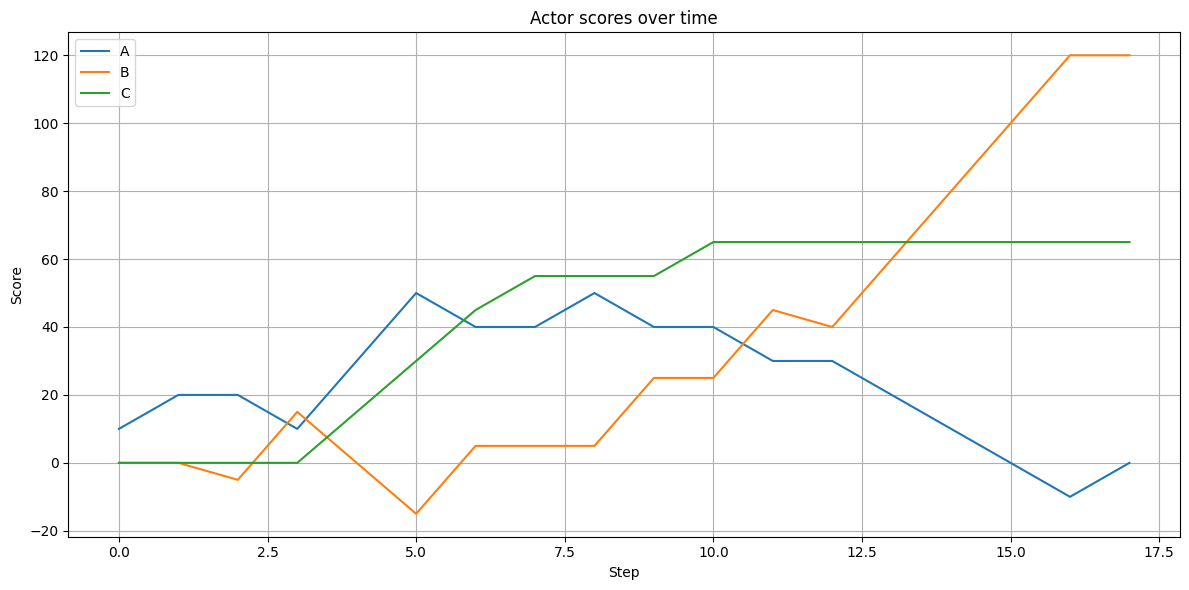

Decisions:
[0] A's decision: disclose (+10)
[1] A's decision: disclose (+10)
[2] B's decision: attack, failed attack (-5)
[3] B's decision: attack, successful attack on A (+20, -10)
[4] C's decision: sell, sold to A (+15) → A attacks, successful attack on B (+20, -15)
[5] C's decision: sell, sold to A (+15) → A attacks, successful attack on B (+20, -15)
[6] C's decision: sell, sold to B (+15) → B attacks, successful attack on A (+20, -10)
[7] C's decision: disclose (+10)
[8] A's decision: disclose (+10)
[9] B's decision: attack, successful attack on A (+20, -10)
[10] C's decision: disclose (+10)
[11] B's decision: attack, successful attack on A (+20, -10)
[12] B's decision: attack, failed attack (-5)
[13] C's decision: attack – cannot attack
[14] C's decision: attack – cannot attack
[15] B's decision: attack, successful attack on A (+20, -10)
[16] B's decision: attack, successful attack on A (+20, -10)
[17] B's decision: attack, successful attack on A (+20, -10)
[18] B's decision: atta

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import nashpy as nash

# Actors and default values
actors = ["A", "B", "C"]
num_steps = 20  # Number of steps
disclose_reward = 10
sell_reward = 15
attack_gain = 20
attack_loss = {"A": -10, "B": -15}
attack_fail_penalty = -5
attack_success_chance = {"A": 0.7, "B": 0.5}

# Utility matrices for A and B
utility_matrix_A = [
    [5, 0],
    [10, 2]
]

utility_matrix_B = [
    [5, 10],
    [0, 2]
]

# Cost matrices for A and B
cost_matrix_A = [
    [3, 0],
    [5, 4]
]

cost_matrix_B = [
    [3, 5],
    [0, 3]
]

# Payoff matrices for A and B
payoff_matrix_A = np.array([
    [utility_matrix_A[i][j] - cost_matrix_A[i][j] for j in range(len(utility_matrix_A[i]))]
    for i in range(len(utility_matrix_A))
])

payoff_matrix_B = np.array([
    [utility_matrix_B[i][j] - cost_matrix_B[i][j] for j in range(len(utility_matrix_B[i]))]
    for i in range(len(utility_matrix_B))
])

# Creating the game
game = nash.Game(payoff_matrix_A, payoff_matrix_B)

# Calculating Nash equilibrium
equilibria = game.support_enumeration()

print("\nPayoff matrix for A:")
print(payoff_matrix_A)
print("\nPayoff matrix for B:")
print(payoff_matrix_B)

# Printing results
for eq in equilibria:
    print("\nNash equilibrium:", eq)

    # Payoffs corresponding to the equilibria
    strategy_A = eq[0]
    strategy_B = eq[1]

    # A's and B's payoffs in the given equilibrium
    payoff_A = np.dot(strategy_A, payoff_matrix_A).dot(strategy_B)
    payoff_B = np.dot(strategy_A, payoff_matrix_B).dot(strategy_B)

    print(f"A player's payoff: {payoff_A}")
    print(f"B player's payoff: {payoff_B}")

# Decision logic: actors make rational decisions
def decide_action_rational(discoverer):
    # Use A and B’s payoff matrices
    if discoverer == "A":
        payoff_matrix = payoff_matrix_A
    elif discoverer == "B":
        payoff_matrix = payoff_matrix_B
    else:
        # If the actor is C, choose randomly since C has no defined payoff matrix
        return random.choice(["disclose", "sell", "attack"])

    # Rational decision based on best payoff (maximize reward)
    # Choose the best action based on the payoff matrix
    best_choice = np.argmax(payoff_matrix[0])  # Select the best payoff
    return "disclose" if best_choice == 0 else "attack"

# Logging decisions
decisions_log = []

# Initialize simulation data
scores = {"A": 0, "B": 0, "C": 0}
history = {"A": [], "B": [], "C": []}

# Simulation steps
for step in range(num_steps):
    discoverer = random.choice(actors)
    action = decide_action_rational(discoverer)
    log_entry = f"[{step}] {discoverer}'s decision: {action}"

    if action == "disclose":
        scores[discoverer] += disclose_reward
        log_entry += f" (+{disclose_reward})"

    elif action == "sell":
        scores[discoverer] += sell_reward
        buyer = random.choice(["A", "B"])
        log_entry += f", sold to {buyer} (+{sell_reward})"
        discoverer = buyer
        action = "attack"
        log_entry += f" → {discoverer} attacks"

    if action == "attack":
        if discoverer not in ["A", "B"]:
            decisions_log.append(log_entry + " – cannot attack")
            continue
        target = "B" if discoverer == "A" else "A"
        success_prob = attack_success_chance[discoverer]
        success = random.random() < success_prob
        if success:
            scores[discoverer] += attack_gain
            scores[target] += attack_loss[target]
            log_entry += f", successful attack on {target} (+{attack_gain}, {attack_loss[target]})"
        else:
            scores[discoverer] += attack_fail_penalty
            log_entry += f", failed attack ({attack_fail_penalty})"

    decisions_log.append(log_entry)

    for actor in actors:
        history[actor].append(scores[actor])

# Visualization of scores
plt.figure(figsize=(12, 6))
for actor in actors:
    plt.plot(history[actor], label=f"{actor}")
plt.xlabel("Step")
plt.ylabel("Score")
plt.title("Actor scores over time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Decisions:")
print("\n".join(decisions_log))



Payoff matrix for A:
[[ 2  0]
 [ 5 -2]]

Payoff matrix for B:
[[ 2  5]
 [ 0 -1]]

Nash equilibrium: (array([1., 0.]), array([0., 1.]))
A player's payoff: 0.0
B player's payoff: 5.0

Nash equilibrium: (array([0., 1.]), array([1., 0.]))
A player's payoff: 5.0
B player's payoff: 0.0

Nash equilibrium: (array([0.25, 0.75]), array([0.4, 0.6]))
A player's payoff: 0.8000000000000003
B player's payoff: 0.5000000000000001


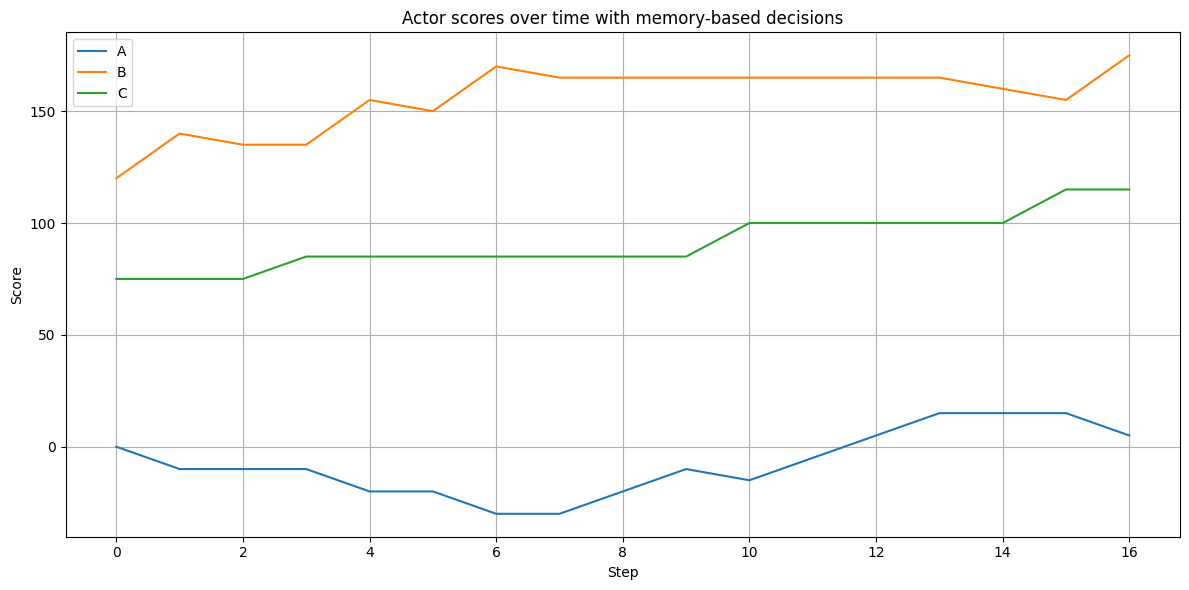

Decisions:
[0] A's decision: disclose (+10)
[1] A's decision: disclose (+10)
[2] B's decision: attack, failed attack (-5)
[3] B's decision: attack, successful attack on A (+20, -10)
[4] C's decision: sell, sold to A (+15) → A attacks, successful attack on B (+20, -15)
[5] C's decision: sell, sold to A (+15) → A attacks, successful attack on B (+20, -15)
[6] C's decision: sell, sold to B (+15) → B attacks, successful attack on A (+20, -10)
[7] C's decision: disclose (+10)
[8] A's decision: disclose (+10)
[9] B's decision: attack, successful attack on A (+20, -10)
[10] C's decision: disclose (+10)
[11] B's decision: attack, successful attack on A (+20, -10)
[12] B's decision: attack, failed attack (-5)
[13] C's decision: attack – cannot attack
[14] C's decision: attack – cannot attack
[15] B's decision: attack, successful attack on A (+20, -10)
[16] B's decision: attack, successful attack on A (+20, -10)
[17] B's decision: attack, successful attack on A (+20, -10)
[18] B's decision: atta

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import nashpy as nash

# Actors and default values
actors = ["A", "B", "C"]
num_steps = 20  # Number of steps
disclose_reward = 10
sell_reward = 15
attack_gain = 20
attack_loss = {"A": -10, "B": -15}
attack_fail_penalty = -5
attack_success_chance = {"A": 0.7, "B": 0.5}

# Utility matrices for A and B
utility_matrix_A = [
    [5, 0],
    [10, 2]
]

utility_matrix_B = [
    [5, 10],
    [0, 2]
]

# Cost matrices for A and B
cost_matrix_A = [
    [3, 0],
    [5, 4]
]

cost_matrix_B = [
    [3, 5],
    [0, 3]
]

# Payoff matrices for A and B
payoff_matrix_A = np.array([
    [utility_matrix_A[i][j] - cost_matrix_A[i][j] for j in range(len(utility_matrix_A[i]))]
    for i in range(len(utility_matrix_A))
])

payoff_matrix_B = np.array([
    [utility_matrix_B[i][j] - cost_matrix_B[i][j] for j in range(len(utility_matrix_B[i]))]
    for i in range(len(utility_matrix_B))
])

# Creating the game
game = nash.Game(payoff_matrix_A, payoff_matrix_B)

# Calculating Nash equilibrium
equilibria = game.support_enumeration()

print("\nPayoff matrix for A:")
print(payoff_matrix_A)
print("\nPayoff matrix for B:")
print(payoff_matrix_B)

# Printing results
for eq in equilibria:
    print("\nNash equilibrium:", eq)

    # Payoffs corresponding to the equilibria
    strategy_A = eq[0]
    strategy_B = eq[1]

    # A's and B's payoffs in the given equilibrium
    payoff_A = np.dot(strategy_A, payoff_matrix_A).dot(strategy_B)
    payoff_B = np.dot(strategy_A, payoff_matrix_B).dot(strategy_B)

    print(f"A player's payoff: {payoff_A}")
    print(f"B player's payoff: {payoff_B}")


# Decision logic: actors make decisions influenced by their past actions and outcomes
def decide_action_with_memory(discoverer, history, step):
    # Access the actor's past decisions
    past_scores = history[discoverer]

    # Influence the decision-making process by the actor's history
    recent_scores = past_scores[-5:]  # Consider the last 5 scores
    avg_score = np.mean(recent_scores) if recent_scores else 0

    # Use A and B’s payoff matrices for actors A and B
    if discoverer == "A":
        payoff_matrix = payoff_matrix_A
    elif discoverer == "B":
        payoff_matrix = payoff_matrix_B
    else:
        # If the actor is C, choose randomly since C has no defined payoff matrix
        return random.choice(["disclose", "sell", "attack"])

    # Modify rational decision based on history
    if avg_score < 10:
        # If the average score is low, they may prefer to attack (higher risk, higher reward)
        best_choice = np.argmax(payoff_matrix[1])  # Prefer attack over disclose
        return "attack" if best_choice == 1 else "disclose"
    else:
        # If the average score is higher, they may prefer a safer strategy (disclose)
        best_choice = np.argmax(payoff_matrix[0])  # Select best payoff for safer actions
        return "disclose" if best_choice == 0 else "attack"

# Simulation steps with memory-based decision logic
history = {"A": [], "B": [], "C": []}  # History of scores for each actor

for step in range(num_steps):
    discoverer = random.choice(actors)
    action = decide_action_with_memory(discoverer, history, step)
    log_entry = f"[{step}] {discoverer}'s decision: {action}"

    if action == "disclose":
        scores[discoverer] += disclose_reward
        log_entry += f" (+{disclose_reward})"

    elif action == "sell":
        scores[discoverer] += sell_reward
        buyer = random.choice(["A", "B"])
        log_entry += f", sold to {buyer} (+{sell_reward})"
        discoverer = buyer
        action = "attack"
        log_entry += f" → {discoverer} attacks"

    if action == "attack":
        if discoverer not in ["A", "B"]:
            decisions_log.append(log_entry + " – cannot attack")
            continue
        target = "B" if discoverer == "A" else "A"
        success_prob = attack_success_chance[discoverer]
        success = random.random() < success_prob
        if success:
            scores[discoverer] += attack_gain
            scores[target] += attack_loss[target]
            log_entry += f", successful attack on {target} (+{attack_gain}, {attack_loss[target]})"
        else:
            scores[discoverer] += attack_fail_penalty
            log_entry += f", failed attack ({attack_fail_penalty})"

    decisions_log.append(log_entry)

    # Update history for each actor
    for actor in actors:
        history[actor].append(scores[actor])

# Visualization of scores
plt.figure(figsize=(12, 6))
for actor in actors:
    plt.plot(history[actor], label=f"{actor}")
plt.xlabel("Step")
plt.ylabel("Score")
plt.title("Actor scores over time with memory-based decisions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Decisions:")
print("\n".join(decisions_log))


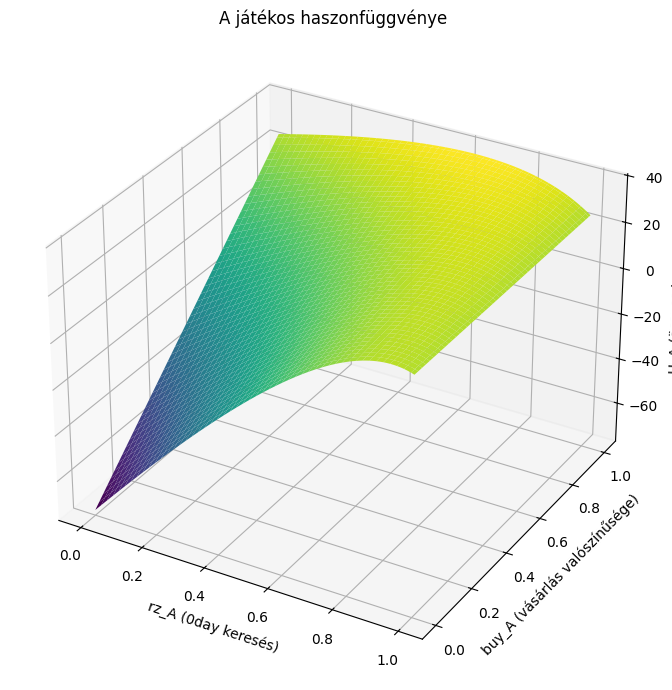

(None,
 np.float64(0.6363636363636365),
 np.float64(1.0),
 np.float64(38.39712918660287))

In [1]:
#Feltételezzük, hogy B egyenlően osztja el az erőforrásait

import numpy as np
import matplotlib.pyplot as plt

# Paraméterek
# V = 150         # nyeremény értéke, V > V0day
# V = 100         # nyeremény értéke, V = V0day
# V = 50         # nyeremény értéke, V < V0day
V0day = 100      # zero-day értéke
rz_B = 0.5      # B zero-day keresési aránya
buy_B = 0.5     # B vásárlási valószínűsége
ra_B = 1 - rz_B # B támadási aránya

# b valószínűség, hogy B-nek van 0day-e
b = rz_B + (1 - rz_B) * buy_B

# rács A paramétereire: rz_A (0day keresés) és buy_A (vásárlás valószínűsége)
rz_A_vals = np.linspace(0, 1, 100)
buy_A_vals = np.linspace(0, 1, 100)

RZ_A, BUY_A = np.meshgrid(rz_A_vals, buy_A_vals)

# ra_A A támadási aránya
RA_A = 1 - RZ_A

# a valószínűség, hogy A-nek van 0day-e
a = RZ_A + (1 - RZ_A) * BUY_A

# UA(1) és UA(2) kiszámítása
UA_1 = - (1 - RZ_A) * BUY_A * V0day
UA_2 = a * (1 - b) * V - (1 - a) * b * V + a * b * V * (RA_A / (RA_A + ra_B))

UA_total = UA_1 + UA_2

# Maximum keresése
max_idx = np.unravel_index(np.argmax(UA_total), UA_total.shape)
max_rz_A = RZ_A[max_idx]
max_buy_A = BUY_A[max_idx]
max_UA = UA_total[max_idx]

# Ábrázolás
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(RZ_A, BUY_A, UA_total, cmap='viridis', edgecolor='none')
ax.set_xlabel('rz_A (0day keresés)')
ax.set_ylabel('buy_A (vásárlás valószínűsége)')
ax.set_zlabel('U_A (összes haszon)')
ax.set_title('A játékos haszonfüggvénye')

plt.tight_layout()
plt.show(), max_rz_A, max_buy_A, max_UA
